Machine Learning Models - Commodity Data

# Import Dependencies

In [1]:
# Dependencies

%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import os
from datetime import datetime
from datetime import date
from datetime import timedelta
from scipy.stats import linregress
from scipy.stats import zscore
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier


In [2]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [3]:
csv_file_train_model_all = os.path.join("model_coded_train_df.csv")
csv_file_test_model_all = os.path.join("model_coded_test_df.csv")
train_model_all_df = pd.read_csv(csv_file_train_model_all)
test_model_all_df = pd.read_csv(csv_file_test_model_all)
train_model_all_df.dropna()
test_model_all_df.dropna()
# train_model_all_df.isnull().sum()


,Unnamed: 0,Date,SPGold_dly_chg_correlation,SPGold_dly_chg_corr_mean,SPGold_Std_daily_chg_correl,SP_Goldupper_correl,SP_Goldlower_correl,SPGoldsignal,SPCopp_dly_chg_correlation,SPCopp_dly_chg_corr_mean,...,SPCopp_sigcode,SPCgrsignal55_sigcode,Vix Daily Chg.,VIX,SPCrudesignal55_sigcode,SPLNHsignal55_sigcode,SPSoyBsignal55_sigcode,SPCtnsignal55_sigcode,SPcornsignal55_sigcode,SP_ret_code
0,3809,2016-05-03,-0.231032,-0.307550,0.048284,-0.210982,-0.404118,0.000000,0.344396,0.387976,...,0,0,6.27,15.60,1,1,0,0,0,4
1,3810,2016-05-04,-0.130767,-0.305805,0.052783,-0.200239,-0.411371,0.069472,0.345444,0.389207,...,0,0,2.88,16.05,0,0,0,0,0,4
2,3811,2016-05-05,-0.142109,-0.304396,0.056060,-0.192276,-0.416515,0.050167,0.333411,0.389917,...,0,0,-0.87,15.91,1,1,0,0,0,4
3,3812,2016-05-06,-0.116200,-0.302522,0.060505,-0.181512,-0.423531,0.065312,0.331790,0.390606,...,0,0,-7.48,14.72,1,1,0,0,0,2
4,3813,2016-05-09,-0.107181,-0.300515,0.065036,-0.170444,-0.430586,0.063262,0.326915,0.391224,...,0,0,-1.02,14.57,1,1,0,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1046,4855,2020-07-06,-0.132872,0.220628,0.140631,0.501889,-0.060633,-0.072239,0.663913,0.516120,...,2,2,0.94,27.94,0,0,0,1,0,1
1047,4856,2020-07-07,-0.092294,0.214357,0.146736,0.507828,-0.079114,-0.013180,0.637124,0.519495,...,0,2,5.33,29.43,2,0,0,0,0,3
1048,4857,2020-07-08,-0.074147,0.208497,0.151712,0.511921,-0.094927,0.000000,0.628596,0.522603,...,0,0,-4.59,28.08,0,0,0,0,0,3
1049,4858,2020-07-09,-0.119715,0.201694,0.157877,0.517449,-0.114060,-0.005655,0.594933,0.525019,...,0,0,4.20,29.26,0,0,0,0,0,3


In [4]:
training_master_df = train_model_all_df.reset_index().copy()
print(f"Training Start Date: {training_master_df.Date[0]}")
print(f"Training End Date: {training_master_df.Date[len(training_master_df)-1]}")
training_master_df = training_master_df.drop(columns=['Date'])
training_master_df = training_master_df.drop(columns=['index','Unnamed: 0'])

training_master_df

Training Start Date: 1998-05-01
Training End Date: 2016-05-02


,SPGold_dly_chg_correlation,SPGold_dly_chg_corr_mean,SPGold_Std_daily_chg_correl,SP_Goldupper_correl,SP_Goldlower_correl,SPGoldsignal,SPCopp_dly_chg_correlation,SPCopp_dly_chg_corr_mean,SPCopp_Std_daily_chg_correl,SP_Coppupper_correl,...,SPCopp_sigcode,SPCgrsignal55_sigcode,Vix Daily Chg.,VIX,SPCrudesignal55_sigcode,SPLNHsignal55_sigcode,SPSoyBsignal55_sigcode,SPCtnsignal55_sigcode,SPcornsignal55_sigcode,SP_ret_code
0,0.053978,0.004485,0.048781,0.102048,-0.093077,0.0,0.093600,0.013084,0.058865,0.130815,...,0,0,-8.69,19.34,0,0,0,0,1,1
1,0.026535,0.005877,0.048287,0.102451,-0.090696,0.0,0.080885,0.012908,0.058643,0.130195,...,0,0,5.07,20.32,0,0,1,0,1,1
2,0.030591,0.007245,0.047893,0.103032,-0.088541,0.0,0.088030,0.012755,0.058431,0.129616,...,0,0,5.61,21.46,0,0,1,1,1,2
3,0.043537,0.008527,0.047904,0.104336,-0.087282,0.0,0.142194,0.013848,0.060285,0.134418,...,2,0,6.20,22.79,0,0,1,1,1,4
4,0.060825,0.010146,0.048143,0.106433,-0.086141,0.0,0.186793,0.015880,0.064145,0.144171,...,2,2,2.63,23.39,0,0,1,1,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3803,-0.360144,-0.293723,0.068138,-0.157448,-0.429998,0.0,0.430473,0.375576,0.082091,0.539757,...,0,0,-0.85,13.96,0,1,0,0,0,1
3804,-0.301166,-0.296983,0.063923,-0.169137,-0.424829,0.0,0.425380,0.379519,0.079070,0.537659,...,0,0,-1.36,13.77,0,1,0,0,0,1
3805,-0.320142,-0.300648,0.059101,-0.182445,-0.418850,0.0,0.406698,0.382728,0.076436,0.535600,...,0,0,10.53,15.22,0,1,0,0,0,1
3806,-0.342376,-0.304663,0.053989,-0.196686,-0.412640,0.0,0.357236,0.385053,0.073575,0.532203,...,0,0,3.15,15.70,0,1,0,0,0,2


In [5]:
testing_master_df = test_model_all_df.reset_index().copy()
print(f"Testing Start Date: {testing_master_df.Date[0]}")
print(f"Testing End Date: {testing_master_df.Date[len(testing_master_df)-1]}")
testing_master_df = testing_master_df.drop(columns=['index','Date'])
testing_master_df = testing_master_df.drop(columns=['Unnamed: 0'])
testing_master_df.head()

Testing Start Date: 2016-05-03
Testing End Date: 2020-07-10


,SPGold_dly_chg_correlation,SPGold_dly_chg_corr_mean,SPGold_Std_daily_chg_correl,SP_Goldupper_correl,SP_Goldlower_correl,SPGoldsignal,SPCopp_dly_chg_correlation,SPCopp_dly_chg_corr_mean,SPCopp_Std_daily_chg_correl,SP_Coppupper_correl,...,SPCopp_sigcode,SPCgrsignal55_sigcode,Vix Daily Chg.,VIX,SPCrudesignal55_sigcode,SPLNHsignal55_sigcode,SPSoyBsignal55_sigcode,SPCtnsignal55_sigcode,SPcornsignal55_sigcode,SP_ret_code
0,-0.231032,-0.307550,0.048284,-0.210982,-0.404118,0.000000,0.344396,0.387976,0.069791,0.527557,...,0,0,6.27,15.60,1,1,0,0,0,4
1,-0.130767,-0.305805,0.052783,-0.200239,-0.411371,0.069472,0.345444,0.389207,0.068392,0.525992,...,0,0,2.88,16.05,0,0,0,0,0,4
2,-0.142109,-0.304396,0.056060,-0.192276,-0.416515,0.050167,0.333411,0.389917,0.067588,0.525092,...,0,0,-0.87,15.91,1,1,0,0,0,4
3,-0.116200,-0.302522,0.060505,-0.181512,-0.423531,0.065312,0.331790,0.390606,0.066779,0.524165,...,0,0,-7.48,14.72,1,1,0,0,0,2
4,-0.107181,-0.300515,0.065036,-0.170444,-0.430586,0.063262,0.326915,0.391224,0.066012,0.523248,...,0,0,-1.02,14.57,1,1,0,0,0,4


In [6]:
training_master_df.corr()

,SPGold_dly_chg_correlation,SPGold_dly_chg_corr_mean,SPGold_Std_daily_chg_correl,SP_Goldupper_correl,SP_Goldlower_correl,SPGoldsignal,SPCopp_dly_chg_correlation,SPCopp_dly_chg_corr_mean,SPCopp_Std_daily_chg_correl,SP_Coppupper_correl,...,SPCopp_sigcode,SPCgrsignal55_sigcode,Vix Daily Chg.,VIX,SPCrudesignal55_sigcode,SPLNHsignal55_sigcode,SPSoyBsignal55_sigcode,SPCtnsignal55_sigcode,SPcornsignal55_sigcode,SP_ret_code
SPGold_dly_chg_correlation,1.000000,0.774751,0.157411,0.714311,0.676992,0.164250,0.478601,0.506712,-0.099320,0.457906,...,0.015949,0.032494,-0.003014,-0.166691,-0.026071,0.022756,-0.051663,-0.042434,-0.040580,0.062841
SPGold_dly_chg_corr_mean,0.774751,1.000000,0.184167,0.914147,0.882901,-0.190593,0.439646,0.552554,-0.070778,0.514401,...,-0.029448,0.025203,0.003602,-0.165580,-0.041621,0.024012,-0.030818,-0.067765,-0.079117,0.055448
SPGold_Std_daily_chg_correl,0.157411,0.184167,1.000000,0.566805,-0.298927,0.006162,0.304350,0.350010,0.123656,0.393495,...,-0.009006,-0.078922,-0.015369,0.132044,-0.086039,-0.080111,-0.013129,-0.052804,-0.048087,0.034523
SP_Goldupper_correl,0.714311,0.914147,0.566805,1.000000,0.616749,-0.157211,0.494032,0.607502,-0.008325,0.593458,...,-0.028398,-0.011425,-0.003319,-0.084327,-0.070372,-0.012914,-0.031246,-0.078579,-0.086148,0.060715
SP_Goldlower_correl,0.676992,0.882901,-0.298927,0.616749,1.000000,-0.187987,0.281448,0.369255,-0.127791,0.311439,...,-0.024289,0.062173,0.010840,-0.223840,0.000694,0.061585,-0.023648,-0.040566,-0.053841,0.037341
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SPLNHsignal55_sigcode,0.022756,0.024012,-0.080111,-0.012914,0.061585,-0.026443,-0.040625,0.006458,-0.000110,0.006300,...,0.008878,0.048764,-0.000357,0.011063,0.114874,1.000000,0.027860,0.079338,0.001698,-0.019090
SPSoyBsignal55_sigcode,-0.051663,-0.030818,-0.013129,-0.031246,-0.023648,-0.065829,0.041473,0.035172,-0.026532,0.023899,...,0.093994,0.062270,0.003001,0.004800,0.074147,0.027860,1.000000,0.134621,0.137254,-0.004788
SPCtnsignal55_sigcode,-0.042434,-0.067765,-0.052804,-0.078579,-0.040566,0.040115,-0.014177,-0.050373,-0.031690,-0.062210,...,0.093578,0.069640,0.014182,0.062121,0.087149,0.079338,0.134621,1.000000,0.060791,0.046971
SPcornsignal55_sigcode,-0.040580,-0.079117,-0.048087,-0.086148,-0.053841,-0.006784,0.005669,-0.038283,-0.024095,-0.047284,...,0.075793,0.030908,0.007872,0.021788,0.103110,0.001698,0.137254,0.060791,1.000000,0.046355


In [7]:
# testing_master_df.isnull().sum()
# testing_master_df['Settle'] = testing_master_df['Settle'].replace(np.nan, 0)
# testing_master_df.isnull().sum()
# testing_master_df.head()

# Data Loading and Machine Learning

In [8]:
# Assigning data to X and y

# Training Data
X_train = training_master_df[[
# #                               'SPGold_dly_chg_corr_mean',
#                               'SPGoldsignal',
# #                               'SPCopp_dly_chg_corr_mean',
#                               'SPCoppsignal55',
# #                               'SPCgr_dly_chg_corr_mean',
#                               'SPCgrsignal55',
# #                               'SPCrude_dly_chg_corr_mean',
#                               'SPCrudesignal55',
# #                               'SPLNH_dly_chg_corr_mean',
#                               'SPLNHsignal55',
# #                               'SPSoyB_dly_chg_corr_mean',
#                               'SPSoyBsignal55',
# #                               'SPCtn_dly_chg_corr_mean',
#                               'SPCtnsignal55',
# #                               'SPcorn_dly_chg_corr_mean',
#                               'SPcornsignal55',
#                                     'SPGold_sigcode',
#                                 'SPCopp_sigcode',
#                                 'SPCgrsignal55_sigcode',
#                                 'SPCrudesignal55_sigcode',
#                                 'SPLNHsignal55_sigcode', 
#                                 'SPSoyBsignal55_sigcode', 
#                                 'SPCtnsignal55_sigcode',
#                                 'SPcornsignal55_sigcode',
                                    'Vix Daily Chg.',
                                'SP_Goldupper_correl',
                                'SP_Goldlower_correl',
                                'SP_Coppupper_correl',
                                'SP_Copplower_correl',
                                'SP_Cgrupper_correl',
                                'SP_Cgrlower_correl',
                                'SP_Crudeupper_correl',
                                'SP_Crudelower_correl',
#                                     'SP_LNHupper_correl',
#                                 'SP_LNHlower_correl',
                                'SP_SoyBupper_correl',
                                'SP_SoyBlower_correl',
                                ]]

y_train = training_master_df['SP_ret_code'].values.reshape(-1, 1)
print(X_train.shape, y_train.shape)

# Testing Data
X_test = testing_master_df[[
# #                               'SPGold_dly_chg_corr_mean',
#                               'SPGoldsignal',
# #                               'SPCopp_dly_chg_corr_mean',
#                               'SPCoppsignal55',
# #                               'SPCgr_dly_chg_corr_mean',
#                               'SPCgrsignal55',
# #                               'SPCrude_dly_chg_corr_mean',
#                               'SPCrudesignal55',
# #                               'SPLNH_dly_chg_corr_mean',
#                               'SPLNHsignal55',
# #                               'SPSoyB_dly_chg_corr_mean',
#                               'SPSoyBsignal55',
# #                               'SPCtn_dly_chg_corr_mean',
#                               'SPCtnsignal55',
# #                               'SPcorn_dly_chg_corr_mean',
# #                               'SPcornsignal55',
#                                 'SPGold_sigcode',
#                                 'SPCopp_sigcode',
#                                 'SPCgrsignal55_sigcode',
#                                 'SPCrudesignal55_sigcode',
#                                 'SPLNHsignal55_sigcode', 
#                                 'SPSoyBsignal55_sigcode', 
#                                 'SPCtnsignal55_sigcode',
#                                 'SPcornsignal55_sigcode',
                                    'Vix Daily Chg.',
                                    'SP_Goldupper_correl',
                                'SP_Goldlower_correl',
                                'SP_Coppupper_correl',
                                'SP_Copplower_correl',
                                'SP_Cgrupper_correl',
                                'SP_Cgrlower_correl',
                                'SP_Crudeupper_correl',
                                'SP_Crudelower_correl',
#                                 'SP_LNHupper_correl',
#                                 'SP_LNHlower_correl',
                                'SP_SoyBupper_correl',
                                'SP_SoyBlower_correl',
                                
                                
                               ]]

y_test = testing_master_df['SP_ret_code'].values.reshape(-1,1)
print(X_test.shape, y_test.shape)

(3808, 11) (3808, 1)
(1051, 11) (1051, 1)


In [9]:
X_train

,Vix Daily Chg.,SP_Goldupper_correl,SP_Goldlower_correl,SP_Coppupper_correl,SP_Copplower_correl,SP_Cgrupper_correl,SP_Cgrlower_correl,SP_Crudeupper_correl,SP_Crudelower_correl,SP_SoyBupper_correl,SP_SoyBlower_correl
0,-8.69,0.102048,-0.093077,0.130815,-0.104646,0.123349,-0.115154,0.090647,-0.412357,0.208042,0.073441
1,5.07,0.102451,-0.090696,0.130195,-0.104378,0.119978,-0.113718,0.097330,-0.412113,0.209437,0.068629
2,5.61,0.103032,-0.088541,0.129616,-0.104107,0.116615,-0.112195,0.104641,-0.412142,0.210955,0.063324
3,6.20,0.104336,-0.087282,0.134418,-0.106722,0.117604,-0.112693,0.112252,-0.412408,0.213493,0.056655
4,2.63,0.106433,-0.086141,0.144171,-0.112411,0.121618,-0.114891,0.120103,-0.412233,0.215632,0.050321
...,...,...,...,...,...,...,...,...,...,...,...
3803,-0.85,-0.157448,-0.429998,0.539757,0.211394,0.635514,0.283720,0.623818,0.446351,0.305795,-0.262920
3804,-1.36,-0.169137,-0.424829,0.537659,0.221379,0.631480,0.297017,0.621448,0.450852,0.309145,-0.256958
3805,10.53,-0.182445,-0.418850,0.535600,0.229856,0.627699,0.309415,0.618490,0.455777,0.312825,-0.251766
3806,3.15,-0.196686,-0.412640,0.532203,0.237903,0.622779,0.322524,0.615283,0.460960,0.316028,-0.246190


In [10]:
y_train

array([[1],
       [1],
       [2],
       ...,
       [1],
       [2],
       [1]], dtype=int64)

In [11]:
X_test

,Vix Daily Chg.,SP_Goldupper_correl,SP_Goldlower_correl,SP_Coppupper_correl,SP_Copplower_correl,SP_Cgrupper_correl,SP_Cgrlower_correl,SP_Crudeupper_correl,SP_Crudelower_correl,SP_SoyBupper_correl,SP_SoyBlower_correl
0,6.27,-0.210982,-0.404118,0.527557,0.248394,0.614149,0.340365,0.620647,0.452993,0.329372,-0.234996
1,2.88,-0.200239,-0.411371,0.525992,0.252422,0.613076,0.342445,0.620387,0.453425,0.336861,-0.230504
2,-0.87,-0.192276,-0.416515,0.525092,0.254742,0.612394,0.343782,0.624574,0.446733,0.344826,-0.226038
3,-7.48,-0.181512,-0.423531,0.524165,0.257047,0.612471,0.343641,0.628568,0.440048,0.352418,-0.221188
4,-1.02,-0.170444,-0.430586,0.523248,0.259200,0.612504,0.343580,0.632441,0.433445,0.359396,-0.215950
...,...,...,...,...,...,...,...,...,...,...,...
1046,0.94,0.501889,-0.060633,0.640133,0.392106,0.529038,-0.092721,0.355960,0.165435,0.391973,0.106802
1047,5.33,0.507828,-0.079114,0.646413,0.392577,0.550558,-0.097540,0.358126,0.164197,0.390903,0.106962
1048,-4.59,0.511921,-0.094927,0.651704,0.393503,0.569394,-0.100514,0.357459,0.164543,0.388053,0.107339
1049,4.20,0.517449,-0.114060,0.654477,0.395561,0.583928,-0.100966,0.354429,0.164941,0.386398,0.107660


In [12]:
y_test

array([[4],
       [4],
       [4],
       ...,
       [3],
       [3],
       [3]], dtype=int64)

Scaling the data for models

In [13]:
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

LINEAR REGRESSION

In [14]:
# Create the model using LinearRegression

from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [15]:
# Fit the model to the training data and calculate the scores for the training and testing data

### BEGIN SOLUTION
model.fit(X_train, y_train)
training_score = model.score(X_train_scaled, y_train)
testing_score = model.score(X_test_scaled, y_test)

### END SOLUTION 

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: -0.06445773023944712
Testing Score: -0.1242165190814637


In [16]:
y_test_scaled.shape

(1051, 1)

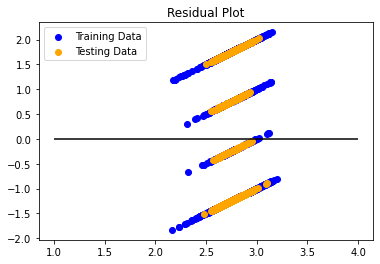

In [17]:
# Plot the results 
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test.min(), xmax=y_test.max())
plt.title("Residual Plot")
plt.show()

In [18]:
from sklearn.metrics import mean_squared_error

predictions = model.predict(X_test_scaled)
MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 7.556063082415885, R2: -8.076990365251794


In [19]:
# Plot the Residuals for the Training and Testing data

### BEGIN SOLUTION
# plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
# plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
# plt.legend()
# # plt.hlines(y=0, xmin=y_train.min(), xmax=y_train.max())
# plt.title("Residual Plot")
# plt.xlabel("Predicted value")
# plt.ylabel("Prediction error")
# plt.show()
### END SOLUTION

In [20]:
csv_file_train_model_coded = os.path.join("model_coded_train_df.csv")
csv_file_test_model_coded = os.path.join("model_coded_test_df.csv")
train_model_coded_df = pd.read_csv(csv_file_train_model_coded)
test_model_coded_df = pd.read_csv(csv_file_test_model_coded)

In [21]:
train_model_coded_df.head()

,Unnamed: 0,Date,SPGold_dly_chg_correlation,SPGold_dly_chg_corr_mean,SPGold_Std_daily_chg_correl,SP_Goldupper_correl,SP_Goldlower_correl,SPGoldsignal,SPCopp_dly_chg_correlation,SPCopp_dly_chg_corr_mean,...,SPCopp_sigcode,SPCgrsignal55_sigcode,Vix Daily Chg.,VIX,SPCrudesignal55_sigcode,SPLNHsignal55_sigcode,SPSoyBsignal55_sigcode,SPCtnsignal55_sigcode,SPcornsignal55_sigcode,SP_ret_code
0,1,1998-05-01,0.053978,0.004485,0.048781,0.102048,-0.093077,0.0,0.093600,0.013084,...,0,0,-8.69,19.34,0,0,0,0,1,1
1,2,1998-05-04,0.026535,0.005877,0.048287,0.102451,-0.090696,0.0,0.080885,0.012908,...,0,0,5.07,20.32,0,0,1,0,1,1
2,3,1998-05-05,0.030591,0.007245,0.047893,0.103032,-0.088541,0.0,0.088030,0.012755,...,0,0,5.61,21.46,0,0,1,1,1,2
3,4,1998-05-06,0.043537,0.008527,0.047904,0.104336,-0.087282,0.0,0.142194,0.013848,...,2,0,6.20,22.79,0,0,1,1,1,4
4,5,1998-05-07,0.060825,0.010146,0.048143,0.106433,-0.086141,0.0,0.186793,0.015880,...,2,2,2.63,23.39,0,0,1,1,1,4


In [22]:
train_model_coded_df = train_model_coded_df.drop(columns=['Date','SP_ret_code','Unnamed: 0'])
test_model_coded_df = test_model_coded_df.drop(columns=['Date'])

KNN

In [23]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
X_scaler = StandardScaler().fit(X_train)

In [24]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

C:\Users\bruce\Anaconda3\envs\PythonAdv\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


k: 1, Train/Test Score: 1.000/0.379


C:\Users\bruce\Anaconda3\envs\PythonAdv\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


k: 3, Train/Test Score: 0.777/0.400


C:\Users\bruce\Anaconda3\envs\PythonAdv\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


k: 5, Train/Test Score: 0.712/0.403


C:\Users\bruce\Anaconda3\envs\PythonAdv\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


k: 7, Train/Test Score: 0.684/0.425


C:\Users\bruce\Anaconda3\envs\PythonAdv\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


k: 9, Train/Test Score: 0.658/0.423


C:\Users\bruce\Anaconda3\envs\PythonAdv\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


k: 11, Train/Test Score: 0.637/0.426


C:\Users\bruce\Anaconda3\envs\PythonAdv\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


k: 13, Train/Test Score: 0.620/0.437


C:\Users\bruce\Anaconda3\envs\PythonAdv\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


k: 15, Train/Test Score: 0.615/0.432


C:\Users\bruce\Anaconda3\envs\PythonAdv\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


k: 17, Train/Test Score: 0.607/0.436


C:\Users\bruce\Anaconda3\envs\PythonAdv\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


k: 19, Train/Test Score: 0.603/0.451


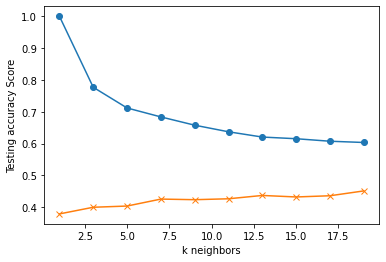

In [25]:
# Loop through different k values to see which has the highest accuracy
train_scores = []
test_scores = []
for k in range(1, 21, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 21, 2), train_scores, marker='o')
plt.plot(range(1, 21, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [26]:
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train_scaled, y_train)
print('k=19 Test Acc: %.3f' % knn.score(X_test_scaled, y_test.ravel()))

k=19 Test Acc: 0.432


C:\Users\bruce\Anaconda3\envs\PythonAdv\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


In [27]:
#retrain model using optimal
knn = KNeighborsClassifier(n_neighbors=17)
knn.fit(X_train_scaled, y_train)
pred = knn.predict(X_test_scaled)

C:\Users\bruce\Anaconda3\envs\PythonAdv\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [28]:
results_df = pd.concat([test_model_all_df, pd.DataFrame(pred)], axis=1)


In [29]:
results_df.head()

,Unnamed: 0,Date,SPGold_dly_chg_correlation,SPGold_dly_chg_corr_mean,SPGold_Std_daily_chg_correl,SP_Goldupper_correl,SP_Goldlower_correl,SPGoldsignal,SPCopp_dly_chg_correlation,SPCopp_dly_chg_corr_mean,...,SPCgrsignal55_sigcode,Vix Daily Chg.,VIX,SPCrudesignal55_sigcode,SPLNHsignal55_sigcode,SPSoyBsignal55_sigcode,SPCtnsignal55_sigcode,SPcornsignal55_sigcode,SP_ret_code,0
0,3809,2016-05-03,-0.231032,-0.307550,0.048284,-0.210982,-0.404118,0.000000,0.344396,0.387976,...,0,6.27,15.60,1,1,0,0,0,4,1
1,3810,2016-05-04,-0.130767,-0.305805,0.052783,-0.200239,-0.411371,0.069472,0.345444,0.389207,...,0,2.88,16.05,0,0,0,0,0,4,1
2,3811,2016-05-05,-0.142109,-0.304396,0.056060,-0.192276,-0.416515,0.050167,0.333411,0.389917,...,0,-0.87,15.91,1,1,0,0,0,4,1
3,3812,2016-05-06,-0.116200,-0.302522,0.060505,-0.181512,-0.423531,0.065312,0.331790,0.390606,...,0,-7.48,14.72,1,1,0,0,0,2,1
4,3813,2016-05-09,-0.107181,-0.300515,0.065036,-0.170444,-0.430586,0.063262,0.326915,0.391224,...,0,-1.02,14.57,1,1,0,0,0,4,1


In [30]:
results_df.to_csv("results.csv")

In [31]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, pred))

#plot_confusion_matrix(classifier, X_test, y_test, cmap=plt.cm.Blues)
# plot_confusion_matrix(KNeighborsClassifier, X_test_scaled, X_test_scaled, cmap=plt.cm.Blues, display_labels=["purple", "yellow"])

# plt.show()

              precision    recall  f1-score   support

           1       0.24      0.48      0.32       225
           2       0.50      0.01      0.03       155
           3       0.00      0.00      0.00        92
           4       0.58      0.60      0.59       579

    accuracy                           0.44      1051
   macro avg       0.33      0.27      0.23      1051
weighted avg       0.45      0.44      0.40      1051



C:\Users\bruce\Anaconda3\envs\PythonAdv\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


RANDOM FOREST

In [32]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train_scaled, y_train)
clf.score(X_test, y_test)

0.41294005708848713

In [33]:
rf = RandomForestClassifier(n_estimators=210)
rf = rf.fit(X_train_scaled, y_train)
rf.score(X_test_scaled, y_test)

C:\Users\bruce\Anaconda3\envs\PythonAdv\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


0.4652711703139867

In [34]:
feature_names = X_train.columns

In [35]:
sorted(zip(rf.feature_importances_, feature_names), reverse=True)

[(0.09688578284675918, 'SP_Coppupper_correl'),
 (0.09664750371292992, 'SP_Goldupper_correl'),
 (0.09536626077979311, 'SP_Crudelower_correl'),
 (0.09432012733260774, 'SP_Goldlower_correl'),
 (0.09407890996663414, 'SP_SoyBupper_correl'),
 (0.0931073992357991, 'SP_Cgrupper_correl'),
 (0.09212507466210514, 'SP_Crudeupper_correl'),
 (0.09139373893504138, 'SP_SoyBlower_correl'),
 (0.09088276087810035, 'SP_Copplower_correl'),
 (0.08901590341410796, 'SP_Cgrlower_correl'),
 (0.0661765382361221, 'Vix Daily Chg.')]

In [37]:
csv_file_train_model_all = os.path.join("model_coded_train_df.csv")
csv_file_test_model_all = os.path.join("model_coded_test_df.csv")
train_model_refine_df = pd.read_csv(csv_file_train_model_all)
test_model_refine_df = pd.read_csv(csv_file_test_model_all)

In [39]:
train_model_refine_df = pd.DataFrame({
    "Date": train_model_refine_df["Date"],
    "Vix Daily Chg.": train_model_refine_df["Vix Daily Chg."],
    "SP_Goldupper_correl": train_model_refine_df["SP_Goldupper_correl"],
    "SP_Goldlower_correl": train_model_refine_df["SP_Goldlower_correl"],
    "SP_Coppupper_correl": train_model_refine_df["SP_Coppupper_correl"],
    "SP_Copplower_correl": train_model_refine_df["SP_Copplower_correl"],
    "SP_Cgrupper_correl": train_model_refine_df["SP_Cgrupper_correl"],
    "SP_Cgrlower_correl": train_model_refine_df["SP_Cgrlower_correl"],
     "SP_Crudeupper_correl": train_model_refine_df["SP_Crudeupper_correl"],
     "SP_Crudelower_correl": train_model_refine_df["SP_Crudelower_correl"],
     "SP_SoyBupper_correl": train_model_refine_df["SP_SoyBupper_correl"],
    "SP_SoyBlower_correl": train_model_refine_df["SP_SoyBlower_correl"]
    })
train_model_refine_df.head()



,Date,Vix Daily Chg.,SP_Goldupper_correl,SP_Goldlower_correl,SP_Coppupper_correl,SP_Copplower_correl,SP_Cgrupper_correl,SP_Cgrlower_correl,SP_Crudeupper_correl,SP_Crudelower_correl,SP_SoyBupper_correl,SP_SoyBlower_correl
0,1998-05-01,-8.69,0.102048,-0.093077,0.130815,-0.104646,0.123349,-0.115154,0.090647,-0.412357,0.208042,0.073441
1,1998-05-04,5.07,0.102451,-0.090696,0.130195,-0.104378,0.119978,-0.113718,0.097330,-0.412113,0.209437,0.068629
2,1998-05-05,5.61,0.103032,-0.088541,0.129616,-0.104107,0.116615,-0.112195,0.104641,-0.412142,0.210955,0.063324
3,1998-05-06,6.20,0.104336,-0.087282,0.134418,-0.106722,0.117604,-0.112693,0.112252,-0.412408,0.213493,0.056655
4,1998-05-07,2.63,0.106433,-0.086141,0.144171,-0.112411,0.121618,-0.114891,0.120103,-0.412233,0.215632,0.050321


In [40]:
test_model_refine_df = pd.DataFrame({
    "Date": train_model_refine_df["Date"],
    "Vix Daily Chg.": train_model_refine_df["Vix Daily Chg."],
    "SP_Goldupper_correl": train_model_refine_df["SP_Goldupper_correl"],
    "SP_Goldlower_correl": train_model_refine_df["SP_Goldlower_correl"],
    "SP_Coppupper_correl": train_model_refine_df["SP_Coppupper_correl"],
    "SP_Copplower_correl": train_model_refine_df["SP_Copplower_correl"],
    "SP_Cgrupper_correl": train_model_refine_df["SP_Cgrupper_correl"],
    "SP_Cgrlower_correl": train_model_refine_df["SP_Cgrlower_correl"],
     "SP_Crudeupper_correl": train_model_refine_df["SP_Crudeupper_correl"],
     "SP_Crudelower_correl": train_model_refine_df["SP_Crudelower_correl"],
     "SP_SoyBupper_correl": train_model_refine_df["SP_SoyBupper_correl"],
    "SP_SoyBlower_correl": train_model_refine_df["SP_SoyBlower_correl"]
    })
test_model_refine_df.head()

,Date,Vix Daily Chg.,SP_Goldupper_correl,SP_Goldlower_correl,SP_Coppupper_correl,SP_Copplower_correl,SP_Cgrupper_correl,SP_Cgrlower_correl,SP_Crudeupper_correl,SP_Crudelower_correl,SP_SoyBupper_correl,SP_SoyBlower_correl
0,1998-05-01,-8.69,0.102048,-0.093077,0.130815,-0.104646,0.123349,-0.115154,0.090647,-0.412357,0.208042,0.073441
1,1998-05-04,5.07,0.102451,-0.090696,0.130195,-0.104378,0.119978,-0.113718,0.097330,-0.412113,0.209437,0.068629
2,1998-05-05,5.61,0.103032,-0.088541,0.129616,-0.104107,0.116615,-0.112195,0.104641,-0.412142,0.210955,0.063324
3,1998-05-06,6.20,0.104336,-0.087282,0.134418,-0.106722,0.117604,-0.112693,0.112252,-0.412408,0.213493,0.056655
4,1998-05-07,2.63,0.106433,-0.086141,0.144171,-0.112411,0.121618,-0.114891,0.120103,-0.412233,0.215632,0.050321


In [ ]:
test_model_refine_df.to_csv("SP500_2nd.csv")
 test_model_refine_df.to_csv("SP500_2nd.csv")
